Data Generation
===

In [217]:
%matplotlib inline

import numpy as np
from numpy.random import rand, randn
import matplotlib.pyplot as plt

In [218]:
n, d, k = 100, 2, 2

In [219]:
X = rand(n, d)

In [220]:
# means = [rand(d)  for _ in range(k)]  # works for any k
means = [rand(d) * 0.5 + 0.5 , - rand(d)  * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d,d).diagonal())

sigmas = [S]*k # we'll use the same Sigma for all clusters for better visual results

print(means)
print(sigmas)

[array([ 0.86989432,  0.83467365]), array([ 0.47052075,  0.09196571])]
[array([[ 0.97627464,  0.        ],
       [ 0.        ,  0.76989876]]), array([[ 0.97627464,  0.        ],
       [ 0.        ,  0.76989876]])]


Solution
===

In [221]:
def compute_log_p(X, mean, sigma):
    dxm = X - mean
    exponent = -0.5 * np.sum(dxm * np.dot(dxm, np.linalg.inv(sigma)), axis=1)
    return exponent - np.log(2 * np.pi) * (d / 2) - 0.5 * np.log(np.linalg.det(sigma))

In [222]:
log_ps = [compute_log_p(X, m, s) for m, s in zip(means, sigmas)] # exercise: try to do this without looping

In [223]:
assignments = np.argmax(log_ps, axis=0)
print(assignments)

[1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0
 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0]


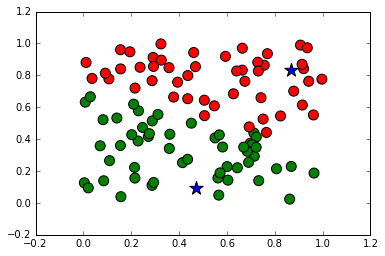

In [224]:
plt.scatter(X[:, 0], X[:, 1], c=np.array(['red', 'green'])[assignments], s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=200)
plt.show()